# Task 1

In [1]:
import os 
os.chdir('E:')
import pandas as pd
c1=pd.read_csv('Toyota.csv',na_values=['??','????'],index_col=0)
c2=c1.copy()
c3=c1.copy()

#to check null values isnull() or isna() it returns boolean values if we have nan values
print(c2.isna().sum())

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64


In [2]:
#sunsetting rows which have one or more missing values
missing = c2[c2.isna().any(axis=1)] #any for atleast

In [3]:
#two ways of approch
#1.fill the missing values with mean/median,in case of numerical values
#2.fill the missing values with thw class which has maximum count, in case of categorical values


In [4]:
#impute missing values
#describe statistics that summerize the central tendency ,dispertion and shape of the dataset's distribution,exclusing nan
print(c1.describe())

              Price          Age             KM           HP     MetColor  \
count   1436.000000  1336.000000    1421.000000  1430.000000  1286.000000   
mean   10730.824513    55.672156   68647.239972   101.478322     0.674961   
std     3626.964585    18.589804   37333.023589    14.768255     0.468572   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    43.000000   43210.000000    90.000000     0.000000   
50%     9900.000000    60.000000   63634.000000   110.000000     1.000000   
75%    11950.000000    70.000000   87000.000000   110.000000     1.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

         Automatic           CC      Weight  
count  1436.000000  1436.000000  1436.00000  
mean      0.055710  1566.827994  1072.45961  
std       0.229441   187.182436    52.64112  
min       0.000000  1300.000000  1000.00000  
25%       0.000000  1400.000000  1040.00000  
50%       0.000000  1600.00000

In [5]:
#calculate mean value of age
print(c2['Age'].mean())
c2['Age'].fillna(c2['Age'].mean(),inplace=True)

print(c2['KM'].median())
c2['KM'].fillna(c2['KM'].median(),inplace=True)

print(c2['HP'].mean())
c2['HP'].fillna(c2['HP'].mean(),inplace=True)
print(c2.isna().sum())

55.67215568862275
63634.0
101.47832167832168
Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64


In [6]:
#for categorical value
#gives output on descending order
print(c2['FuelType'].value_counts().index[0]) #index for get seprate mode value
c2['FuelType'].fillna(c2['FuelType'].value_counts().index[0],inplace=True)

print(c2['MetColor'].mode())
c2['MetColor'].fillna(c2['MetColor'].mode()[0],inplace=True)

print(c2.isna().sum())

Petrol
0    1.0
dtype: float64
Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


In [7]:
#how to imputation in one shot 
c3 = c3.apply(lambda x:x.fillna(x.mean()) if x.dtype == 'float' else x.fillna(x.value_counts().index[0]))
print(c3.isna().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64


# Task 2 & 3

In [8]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import preprocessing
import pandas as pd

df = pd.read_csv('train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
#Data cleaning

df['Age'].fillna(df['Age'].median(),inplace=True)

df = df.dropna(axis=0, subset=['Embarked'])

In [10]:
drop_column = ['Cabin']
df.drop(drop_column, axis=1, inplace = True)

In [11]:
print(df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [12]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['Sex']= label_encoder.fit_transform(df['Sex']) 
df['Sex'].unique()
print(df['Sex'])


df['Embarked']= label_encoder.fit_transform(df['Embarked']) 
df['Embarked'].unique()
print(df['Embarked'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: int32


In [13]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in df:
    df['Title'] = df['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in df:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Mr


In [15]:
#Label Encoding
label_encoder = preprocessing.LabelEncoder()
df['Title']= label_encoder.fit_transform(df['Title']) 
df['Title'].unique()
print(df['Title'])

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Title, Length: 889, dtype: int32


In [16]:
feature = df[['Pclass','Age','Sex','SibSp','Parch','Survived','Embarked','Title']]
feature = feature.dropna()
print(feature.shape)

x = feature.drop('Survived',axis=1)

y = feature['Survived']
print(y)

(889, 8)
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print(y_test)

281    0
435    1
39     1
418    0
585    1
      ..
405    0
790    0
845    0
658    0
785    0
Name: Survived, Length: 89, dtype: int64


In [18]:
model=DecisionTreeClassifier(criterion="gini",
                             max_depth=4,
                            splitter='best',
                             min_samples_split=2)
model.fit(x_train,y_train)
print(model)
y_pred = model.predict(x_test)
print(y_pred)

DecisionTreeClassifier(max_depth=4)
[0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0]


In [19]:
from sklearn import metrics
a=metrics.accuracy_score(y_pred,y_test)
print(a)

0.8651685393258427


[Text(170.3892857142857, 195.696, 'X[2] <= 0.5\ngini = 0.474\nsamples = 800\nvalue = [491, 309]'),
 Text(95.65714285714286, 152.208, 'X[0] <= 2.5\ngini = 0.384\nsamples = 278\nvalue = [72, 206]'),
 Text(47.82857142857143, 108.72, 'X[1] <= 56.5\ngini = 0.09\nsamples = 149\nvalue = [7, 142]'),
 Text(23.914285714285715, 65.232, 'X[1] <= 23.5\ngini = 0.08\nsamples = 144\nvalue = [6, 138]'),
 Text(11.957142857142857, 21.744, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(35.871428571428574, 21.744, 'gini = 0.104\nsamples = 109\nvalue = [6, 103]'),
 Text(71.74285714285715, 65.232, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(59.785714285714285, 21.744, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(83.7, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(143.4857142857143, 108.72, 'X[5] <= 1.5\ngini = 0.5\nsamples = 129\nvalue = [65, 64]'),
 Text(119.57142857142857, 65.232, 'X[1] <= 29.75\ngini = 0.425\nsamples = 49\nvalue = [15, 34]'),
 Text(107.61428571428

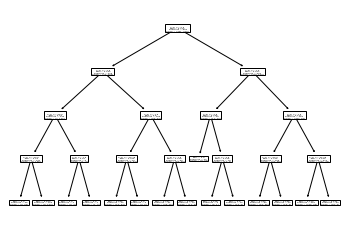

In [20]:
from sklearn import tree
tree.plot_tree(model)